## Preambule

In [5]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

## Read data

In [3]:
xr_dataread = xr.open_dataset("K:/ECEMF/T5.2/xr_dataread.nc")
xr_nld = xr.open_dataset("K:/ECEMF/T5.2/Allocations/xr_alloc_NLD.nc")

In [144]:
basic_settings = {'Temperature': 1.5, 'Risk': 0.5, 'NegEmis': 0.5, 'NonCO2red': 0.5, 'Scenario':'SSP2', 'Convergence_year':2050}
rules = ['GF', 'PCC', 'PC', 'AP', 'ECPC', 'GDR']
rulecolors = ['sienna', 'forestgreen', 'goldenrod', 'mediumvioletred', 'tomato', 'steelblue']
rulenames = ['Grandfathering', 'Per capita convergence', 'Per capita', 'Ability to pay', "Equal cumulative per capita", 'Greenhouse Development Rights']

In [87]:
emis_1990 = xr_dataread.GHG_hist.sel(Region='NLD', Time=1990)

## Plot

In [206]:
dt = 0.5
xr_nld = xr_nld.sel(Time=np.arange(2021, 2041))

Text(0, 0.5, 'GHG emissions including LULUCF\nin the Netherlands')

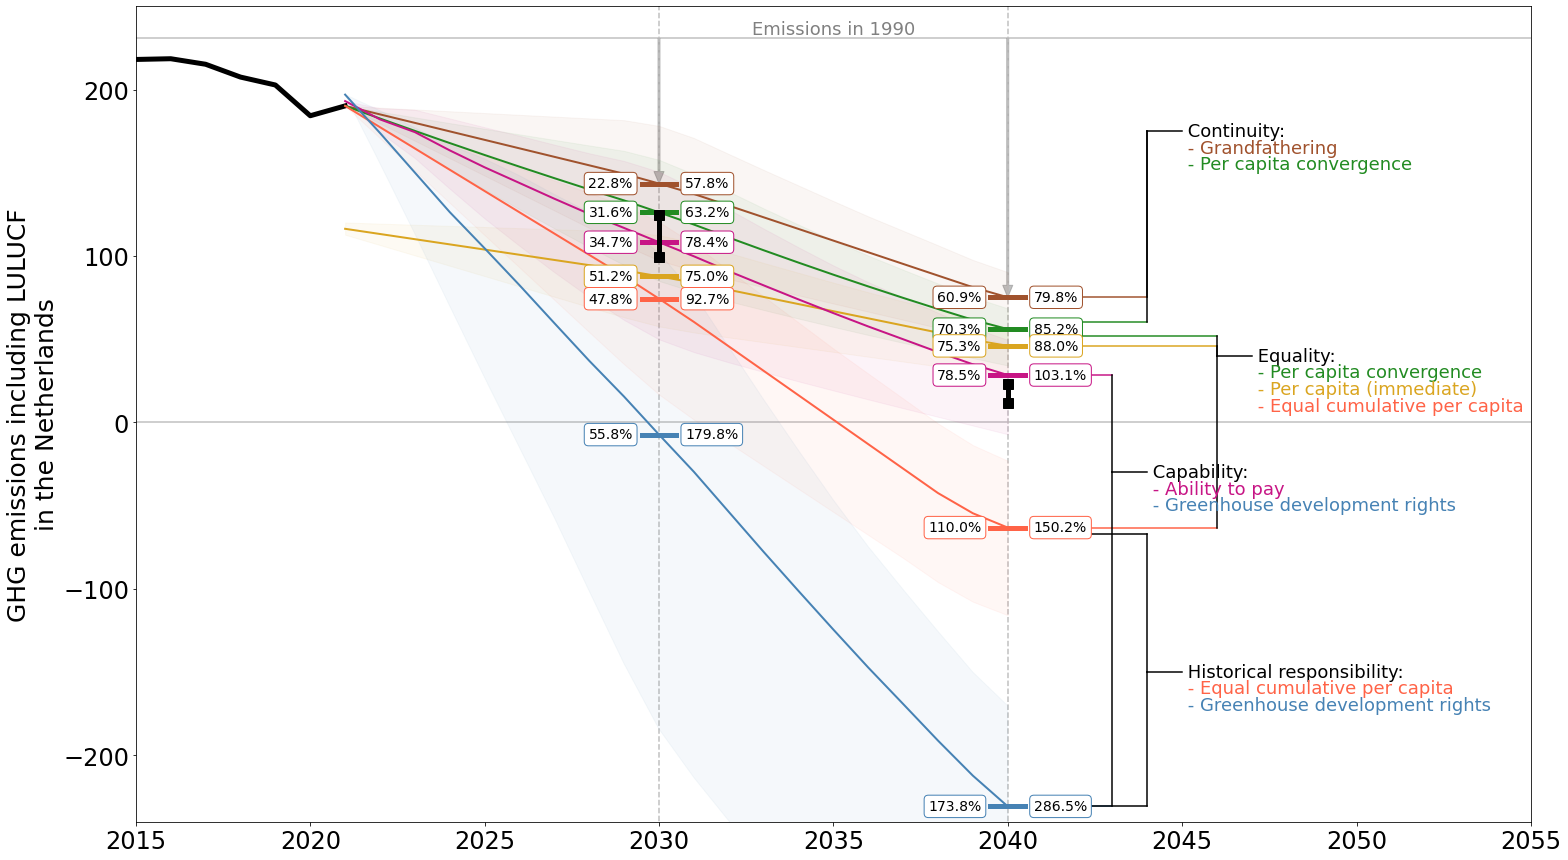

In [246]:
fig, ax = plt.subplots(figsize=(25, 15), facecolor='w')

ax.plot(xr_dataread.Time, xr_dataread.GHG_hist.sel(Region='NLD'), lw=5, c='k', label='Historical emissions')
#ax.plot([2021, 1e5], [xr_dataread.GHG_hist.sel(Region='NLD', Time=2021), xr_dataread.GHG_hist.sel(Region='NLD', Time=2021)], 'silver', zorder=-1e9)
ax.plot([1990, 1e5], [xr_dataread.GHG_hist.sel(Region='NLD', Time=1990), xr_dataread.GHG_hist.sel(Region='NLD', Time=1990)], 'silver', zorder=-1e9)
#ax.text(2050, xr_dataread.GHG_hist.sel(Region='NLD', Time=2021), 'Emissions in 2021', color='grey', va='bottom', ha='center', fontsize=15)
ax.text(2035, emis_1990, 'Emissions in 1990', color='grey', va='bottom', ha='center', fontsize=18)

for rule_i, rule in enumerate(rules):
    dat = xr_nld.sel(**basic_settings)[rule].mean(dim='Timing')
    ax.plot(xr_nld.Time, dat, lw=2, c=rulecolors[rule_i])
    y1 = xr_nld.sel({'Temperature': 1.5, 'Risk': 0.5, 'Convergence_year':2050}).max(dim=['Scenario', 'NonCO2red', 'NegEmis', 'Timing'], skipna=False)[rule]
    y2 = xr_nld.sel({'Temperature': 1.5, 'Risk': 0.5, 'Convergence_year':2050}).min(dim=['Scenario', 'NonCO2red', 'NegEmis', 'Timing'], skipna=False)[rule]
    ax.fill_between(xr_nld.Time, y1, y2, where=y1>=y2, color=rulecolors[rule_i], alpha=0.05)
    bbox = dict(boxstyle="round", fc='white', ec=rulecolors[rule_i])
    for year in [2030, 2040]:
        val = dat.sel(Time=year)
        if year == 2030: ax.plot([year-dt, year+dt], [val, val], lw=5, label=rulenames[rule_i], c=rulecolors[rule_i])
        else: ax.plot([year-dt, year+dt], [val, val], lw=5, c=rulecolors[rule_i])
        if rule == 'GF':
            ax.annotate("", xy=(year, val), xytext=(year, emis_1990),
                        arrowprops=dict(color='grey', width=2, headwidth=10, alpha=0.5), zorder=-1e9)
        ax.text(year+dt*1.5, val, str(np.round(-float((y2.sel(Time=year)-emis_1990)/emis_1990)*100,1))+'%', bbox=bbox, fontsize=14, va='center', ha='left')
        ax.text(year-dt*1.5, val, str(np.round(-float((y1.sel(Time=year)-emis_1990)/emis_1990)*100,1))+'%', bbox=bbox, fontsize=14, va='center', ha='right')

# Annotations
vals = xr_nld.sel(**basic_settings).mean(dim='Timing')
ref = 2044
col = 'k'
dy = 4
ax.plot([2042, ref], [vals.GF.sel(Time=2040), vals.GF.sel(Time=2040)], rulecolors[0], zorder=-1)
ax.plot([ref, ref], [vals.GF.sel(Time=2040), 175], col, zorder=-1)
ax.plot([ref, ref+1], [175, 175], col, zorder=-1)
ax.plot([2042, ref], [vals.PCC.sel(Time=2040)+dy, vals.PCC.sel(Time=2040)+dy], rulecolors[1], zorder=-1)
ax.plot([ref, ref], [vals.PCC.sel(Time=2040)+dy, 175], col, zorder=-1)
ax.text(ref+1, 175, " Continuity:", fontsize=18, va='center', ha='left')
ax.text(ref+1, 165, " - Grandfathering", fontsize=18, va='center', ha='left', c=rulecolors[0])
ax.text(ref+1, 155, " - Per capita convergence", fontsize=18, va='center', ha='left', c=rulecolors[1])

ref = 2046
ax.plot([2042, ref], [vals.PC.sel(Time=2040), vals.PC.sel(Time=2040)], rulecolors[2], zorder=-1)
ax.plot([ref, ref], [vals.PC.sel(Time=2040), 40], col, zorder=-1)
ax.plot([ref, ref+1], [40, 40], col, zorder=-1)
ax.plot([2042, ref], [vals.PCC.sel(Time=2040)-dy, vals.PCC.sel(Time=2040)-dy], rulecolors[1], zorder=-1)
ax.plot([ref, ref], [vals.PCC.sel(Time=2040)-dy, 40], col, zorder=-1)
ax.plot([2042, ref], [vals.ECPC.sel(Time=2040), vals.ECPC.sel(Time=2040)], rulecolors[4], zorder=-1)
ax.plot([ref, ref], [vals.ECPC.sel(Time=2040), 40], col, zorder=-1)
ax.text(ref+1, 40, " Equality:", fontsize=18, va='center', ha='left')
ax.text(ref+1, 30, " - Per capita convergence", fontsize=18, va='center', ha='left', c=rulecolors[1])
ax.text(ref+1, 20, " - Per capita (immediate)", fontsize=18, va='center', ha='left', c=rulecolors[2])
ax.text(ref+1, 10, " - Equal cumulative per capita", fontsize=18, va='center', ha='left', c=rulecolors[4])

ref = 2043
ax.plot([2042, ref], [vals.AP.sel(Time=2040), vals.AP.sel(Time=2040)], rulecolors[3], zorder=-1)
ax.plot([ref, ref], [vals.AP.sel(Time=2040), -30], col, zorder=-1)
ax.plot([ref, ref+1], [-30, -30], col, zorder=-1)
ax.plot([2042, ref], [vals.GDR.sel(Time=2040), vals.GDR.sel(Time=2040)], rulecolors[5], zorder=-1)
ax.plot([ref, ref], [vals.GDR.sel(Time=2040), -30], col, zorder=-1)
ax.text(ref+1, -30, " Capability:", fontsize=18, va='center', ha='left')
ax.text(ref+1, -40, " - Ability to pay", fontsize=18, va='center', ha='left', c=rulecolors[3])
ax.text(ref+1, -50, " - Greenhouse development rights", fontsize=18, va='center', ha='left', c=rulecolors[5])

ref = 2044
ax.plot([2042, ref], [vals.ECPC.sel(Time=2040)-dy, vals.ECPC.sel(Time=2040)-dy], col, zorder=-1)
ax.plot([ref, ref], [vals.ECPC.sel(Time=2040)-dy, -150], col, zorder=-1)
ax.plot([ref, ref+1], [-150, -150], col, zorder=-1)
ax.plot([2042, ref], [vals.GDR.sel(Time=2040), vals.GDR.sel(Time=2040)], col, zorder=-1)
ax.plot([ref, ref], [vals.GDR.sel(Time=2040), -150], col, zorder=-1)
ax.text(ref+1, -150, " Historical responsibility:", fontsize=18, va='center', ha='left')
ax.text(ref+1, -160, " - Equal cumulative per capita", fontsize=18, va='center', ha='left', c=rulecolors[4])
ax.text(ref+1, -170, " - Greenhouse development rights", fontsize=18, va='center', ha='left', c=rulecolors[5])

ax.plot([-1e3, 1e5], [0, 0], 'silver', zorder=-1e9)
ax.plot([2030, 2030], [-1e3, 1e3], '--', c='silver', zorder=-1e9)
ax.plot([2040, 2040], [-1e3, 1e3], '--', c='silver', zorder=-1e9)

ax.plot([2030, 2030], [emis_1990*(1-0.57), emis_1990*(1-0.46)], 'k', lw=5)
ax.plot([2030, 2030], [emis_1990*(1-0.57), emis_1990*(1-0.46)], 'ks', ms=10)

ax.plot([2040, 2040], [emis_1990*(1-0.90), emis_1990*(1-0.95)], 'k', lw=5)
ax.plot([2040, 2040], [emis_1990*(1-0.90), emis_1990*(1-0.95)], 'ks', ms=10)

#plt.legend(fontsize=15)
ax.xaxis.set_tick_params(labelsize=24)
ax.yaxis.set_tick_params(labelsize=24)
ax.set_xlim([2015, 2055])
ax.set_ylim([-240, 250])
ax.set_ylabel('GHG emissions including LULUCF\nin the Netherlands', fontsize=25)

## Save